# Week 9 Group Assignment:
## Figuring out our "Common Characterstics" 

This notebook will explore what the predominant characterstics of our 80 locations are. To do this, we will do bar charts of each characterstic (or characterstic group) to figure out what the predominant characterstic is. Once we do this, our goal is to *score* each location based on how many of the 5 characterstics it has. For example, if it has 5/5 it will get a score of 5, 4/5 = score of 4, and so on. Finally, we will then map these locations based on their (color-coded) scores to understand if indeed the locations all share similar characterstics that could potentially make them more dangerous than other locations. 

To get our 80 location points, we used [data](https://geohub.lacity.org/datasets/ladot::los-angeles-collisions-2014through2019/about) from LA City Geohub that tracks Collisions in Los Angeles between 2014-2019. We filtered this data to include only locations where a fatality occured, and then filtered this down further to locations where at least 2 collisions happened at the same location. This brought us to 82 collision locations. 

## Step 1:
Import Libraries

In [25]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Step 2: 
Import Data
This data frame compiles all of our data from various notebooks that we have worked on throughout the quarter. To do this, we wrote our cleaned up dataframes for our various notebooks to file (both csv and geojson), and then combined them all into one notebook in one master dataframe.

In [26]:
# importing data
master = pd.read_csv('Data/SIMPLIFIED_speeds_streets_lights_locations_buffer_buildings.csv')

In [27]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     82 non-null     int64  
 1   Location               82 non-null     object 
 2   Longitude              82 non-null     float64
 3   Latitude               82 non-null     float64
 4   25 mph                 82 non-null     int64  
 5   30 mph                 82 non-null     int64  
 6   35 mph                 82 non-null     int64  
 7   40 mph                 82 non-null     int64  
 8   45 mph                 82 non-null     int64  
 9   Percent Service_S      82 non-null     float64
 10  Percent Residential_S  82 non-null     float64
 11  Percent Footway_S      82 non-null     float64
 12  Percent Primary_S      82 non-null     float64
 13  Percent Secondary_S    82 non-null     float64
 14  Percent Tertiary_S     82 non-null     float64
 15  time_cod

## Step 3: Getting our **Common Characteristics** 

### **Street Lights**
Here we are going to find the mean # of street lights that fall within the 100-feet (or 300 meter) buffer zone surrounding each location. We are doing this because we are interested in finding the locations that have fewer than the mean number of streetlights per location.

In [28]:
# Finding the mean # of streetlights
master['lights_count'].describe()

count    82.000000
mean      2.634146
std       1.453070
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: lights_count, dtype: float64

#### mean number of streetlights = **2.63**
So, this means that for streetlights, our **common characterstic** will be locations that have a streetlight count less than 2.63

### **Building Types** 
Here we are going to make a bar chart of the percentages of building types to determine which building type has the highest percentage amongst our locations.

In [29]:
# getting sum of columns to plug into bar charts
master.sum()

ID                                                                12320064
Location                 ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CAAVA...
Longitude                                                     -9706.003811
Latitude                                                       2794.715834
25 mph                                                                  70
30 mph                                                                  91
35 mph                                                                 277
40 mph                                                                  53
45 mph                                                                   3
Percent Service_S                                              2940.541834
Percent Residential_S                                          2537.015589
Percent Footway_S                                               786.888601
Percent Primary_S                                               793.267404
Percent Secondary_S      

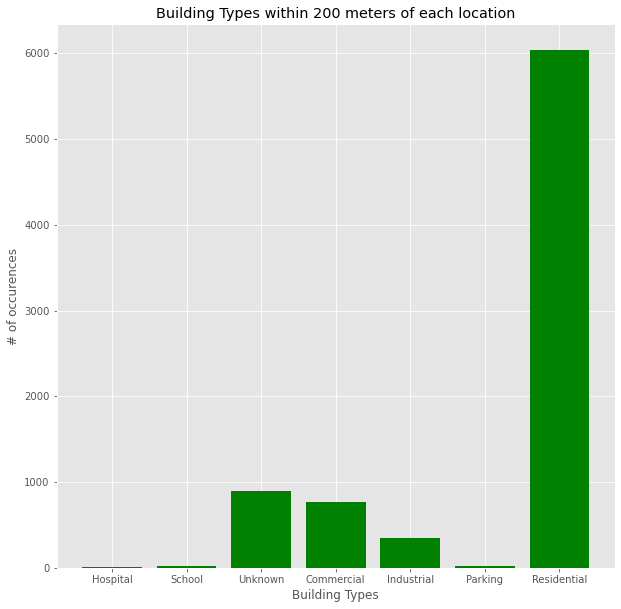

In [30]:
%matplotlib inline
plt.style.use('ggplot')
x = ['Hospital', 'School', 'Unknown', 'Commercial', 'Industrial', 'Parking', 'Residential']
Totals = [13.04, 20.48, 891.78, 767.20, 345.02, 26.17, 6036.32]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, Totals, color='green')
plt.xlabel("Building Types")
plt.ylabel("# of occurences")
plt.title("Building Types within 200 meters of each location")

plt.xticks(x_pos, x)

plt.show()

#### Predominant Building Type = **Residential**
So, this means that for building type, our **common characterstic** will be locations where over 50% of building type is equal to **Residential**

### **Street Type**
Here we are going to make a bar chart of the percentages of street types to determine which street type has the highest percentage amongst our locations.

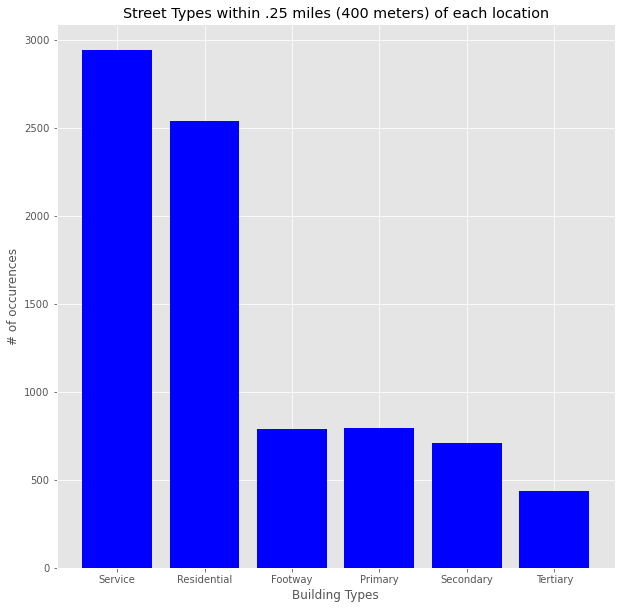

In [31]:
%matplotlib inline
plt.style.use('ggplot')
x = ['Service', 'Residential', 'Footway', 'Primary', 'Secondary', 'Tertiary']
Totals = [2940.54, 2537.02, 786.89, 793.27, 706.59, 435.69]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, Totals, color='blue')
plt.xlabel("Building Types")
plt.ylabel("# of occurences")
plt.title("Street Types within .25 miles (400 meters) of each location")

plt.xticks(x_pos, x)

plt.show()

#### Predominant Street Type = **Service**
So, this means that for street type, our **common characterstic** will be locations where over 50% of street type is equal to **Service**

### **Time Code**
Here we are going to make a bar chart of 3 time categories that colllisions fall into, to see what the predominant time category where collisions took place. To do this, however, we will import a csv spreadsheet that has datapoints of all of the locations from our original dataset where at least 1 fatality occured, and where multiple collisions occured at the same collision. This dataset has 169 datapoints (which makes sense because from that we filtered out duplicate locations). But to understand the different times of days where these collisions happened, we will need to look at all of the collisions before we filtered out the duplicate locations.

Time Codes =
* 1 - Morning: 12:01am - 6:30am
* 2 - Day: 6:31am - 4:45pm
* 3 - Night: 4:46pm - 12:00am

In [32]:
# import new csv with 169 locations

In [33]:
time = pd.read_csv('Data/unfiltered_locations_time_codes.csv')

In [34]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               169 non-null    float64
 1   Y               169 non-null    float64
 2   OBJECTID        169 non-null    int64  
 3   collision_time  169 non-null    int64  
 4   Unnamed: 4      169 non-null    object 
 5   time code       169 non-null    int64  
 6   day_of_week     169 non-null    int64  
 7   match_addr      169 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 10.7+ KB


In [35]:
# getting value counts of # of occurences for each time code
time['time code']. value_counts() 

3    93
2    51
1    25
Name: time code, dtype: int64

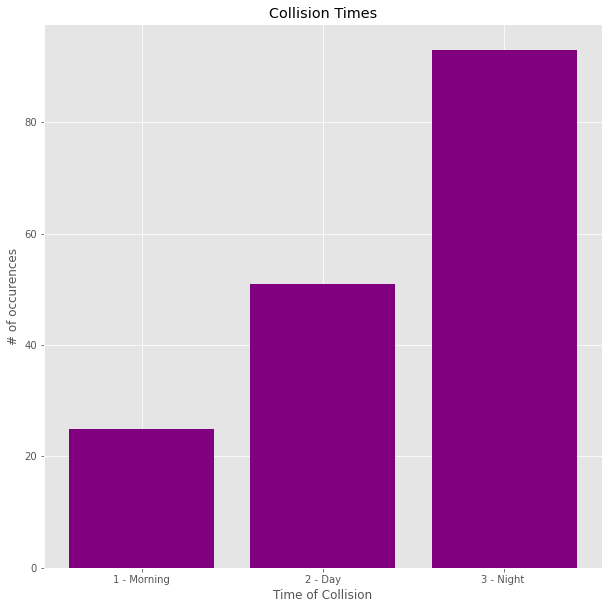

In [36]:
%matplotlib inline
plt.style.use('ggplot')
x = ['1 - Morning', '2 - Day', '3 - Night ']
Totals = [25, 51, 93]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, Totals, color='purple')
plt.xlabel("Time of Collision")
plt.ylabel("# of occurences")
plt.title("Collision Times")

plt.xticks(x_pos, x)

plt.show()

#### Predominant time that collision took place = **Night**
So, this means that for time code, our **common characterstic** will be locations where collisions took place at **Night**

## Speed
Here we are first going to clean up our speed data and then create a bar chart to see what speed is most common at our crash locations.

In [37]:
master

,ID,Location,Longitude,Latitude,25 mph,30 mph,35 mph,40 mph,45 mph,Percent Service_S,...,time_code,lights_count,Percent Hospital_B,Percent School_B,Percent Unknown_B,Percent Commercial_B,Percent Industrial_B,Percent Parking_B,Percent Residential_B,geometry
0,211128,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",-118.270324,34.066662,0,0,2,0,0,36.817102,...,2,5,0.0,0.44843,4.932735,15.695067,2.242152,0.000000,76.681614,POINT (-118.2703238 34.06666183)
1,163711,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",-118.265210,33.925480,0,5,5,0,0,37.254902,...,3,2,0.0,0.00000,39.628483,2.476780,0.000000,0.000000,57.894737,POINT (-118.2652105 33.92547989)
2,30937,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",-118.333482,34.076157,3,0,3,0,0,8.695652,...,2,2,0.0,0.00000,10.101010,0.000000,1.010101,0.000000,88.888889,POINT (-118.3334822 34.07615662)
3,218461,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",-118.256083,34.016045,0,0,0,0,0,39.088729,...,2,3,0.0,0.00000,3.004292,11.587983,10.729614,0.000000,74.678112,POINT (-118.2560831 34.01604462)
4,216930,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",-118.256519,33.953896,0,1,0,0,0,34.582133,...,3,2,0.0,0.00000,6.927711,6.626506,0.903614,0.000000,85.542169,POINT (-118.2565194 33.95389557)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,206521,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",-118.309022,33.967258,0,0,6,0,0,20.634921,...,1,2,0.0,0.00000,2.185792,8.469945,0.000000,0.000000,89.344262,POINT (-118.3090221 33.96725845)
78,108953,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",-118.309024,33.966213,0,7,7,0,0,21.052632,...,3,3,0.0,0.00000,2.393617,6.914894,0.000000,0.000000,90.691489,POINT (-118.309024 33.96621323)
79,179031,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",-118.362514,34.063030,13,13,13,0,0,28.070175,...,2,2,0.0,0.00000,1.515152,10.606061,0.000000,1.010101,86.868687,POINT (-118.3625135 34.06303024)
80,136194,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",-118.571422,34.176991,0,0,2,0,0,20.879121,...,3,1,0.0,0.00000,0.000000,0.000000,0.826446,0.000000,99.173554,POINT (-118.5714218 34.17699051)


In [38]:
#replace all cells with at least one street sign at the mph with a number 1 to simplify
master['25 mph'].values[master['25 mph'].values >= 1] = 1
master['30 mph'].values[master['30 mph'].values >= 1] = 1
master['35 mph'].values[master['35 mph'].values >= 1] = 1
master['40 mph'].values[master['40 mph'].values >= 1] = 1
master['45 mph'].values[master['45 mph'].values >= 1] = 1

In [39]:
master

,ID,Location,Longitude,Latitude,25 mph,30 mph,35 mph,40 mph,45 mph,Percent Service_S,...,time_code,lights_count,Percent Hospital_B,Percent School_B,Percent Unknown_B,Percent Commercial_B,Percent Industrial_B,Percent Parking_B,Percent Residential_B,geometry
0,211128,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",-118.270324,34.066662,0,0,1,0,0,36.817102,...,2,5,0.0,0.44843,4.932735,15.695067,2.242152,0.000000,76.681614,POINT (-118.2703238 34.06666183)
1,163711,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",-118.265210,33.925480,0,1,1,0,0,37.254902,...,3,2,0.0,0.00000,39.628483,2.476780,0.000000,0.000000,57.894737,POINT (-118.2652105 33.92547989)
2,30937,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",-118.333482,34.076157,1,0,1,0,0,8.695652,...,2,2,0.0,0.00000,10.101010,0.000000,1.010101,0.000000,88.888889,POINT (-118.3334822 34.07615662)
3,218461,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",-118.256083,34.016045,0,0,0,0,0,39.088729,...,2,3,0.0,0.00000,3.004292,11.587983,10.729614,0.000000,74.678112,POINT (-118.2560831 34.01604462)
4,216930,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",-118.256519,33.953896,0,1,0,0,0,34.582133,...,3,2,0.0,0.00000,6.927711,6.626506,0.903614,0.000000,85.542169,POINT (-118.2565194 33.95389557)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,206521,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",-118.309022,33.967258,0,0,1,0,0,20.634921,...,1,2,0.0,0.00000,2.185792,8.469945,0.000000,0.000000,89.344262,POINT (-118.3090221 33.96725845)
78,108953,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",-118.309024,33.966213,0,1,1,0,0,21.052632,...,3,3,0.0,0.00000,2.393617,6.914894,0.000000,0.000000,90.691489,POINT (-118.309024 33.96621323)
79,179031,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",-118.362514,34.063030,1,1,1,0,0,28.070175,...,2,2,0.0,0.00000,1.515152,10.606061,0.000000,1.010101,86.868687,POINT (-118.3625135 34.06303024)
80,136194,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",-118.571422,34.176991,0,0,1,0,0,20.879121,...,3,1,0.0,0.00000,0.000000,0.000000,0.826446,0.000000,99.173554,POINT (-118.5714218 34.17699051)


In [40]:
master.sum()

ID                                                                12320064
Location                 ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CAAVA...
Longitude                                                     -9706.003811
Latitude                                                       2794.715834
25 mph                                                                  13
30 mph                                                                  19
35 mph                                                                  65
40 mph                                                                  14
45 mph                                                                   2
Percent Service_S                                              2940.541834
Percent Residential_S                                          2537.015589
Percent Footway_S                                               786.888601
Percent Primary_S                                               793.267404
Percent Secondary_S      

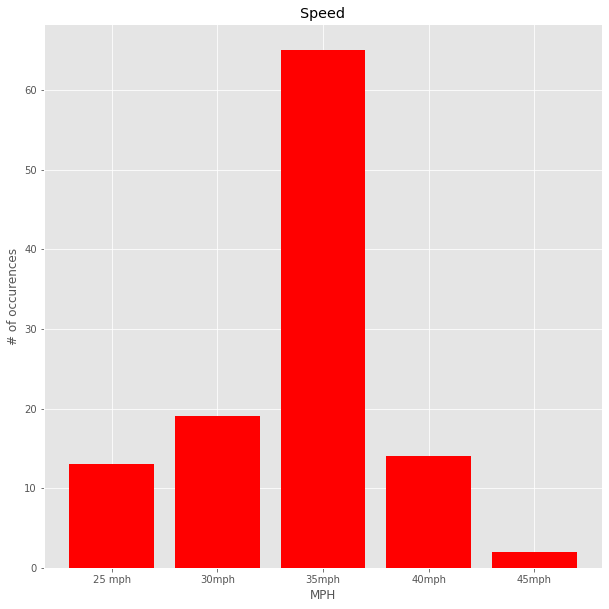

In [41]:


%matplotlib inline
plt.style.use('ggplot')
x = ['25 mph', '30mph', '35mph', '40mph', '45mph']
Totals = [13, 19, 65, 14, 2]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10, 10))
plt.bar(x_pos, Totals, color='red')
plt.xlabel("MPH")
plt.ylabel("# of occurences")
plt.title("Speed")

plt.xticks(x_pos, x)

plt.show()

From this we see that 35mph makes of the majority of the roads at the crash locations. 

### Step 4:
Make a dictionary of our common characterstics and turn into dataframe

In [45]:
d = {'Mean # of Street Lights': [2.36], 'Predom Building Type': ['Residential'], 'Predom Street Type': ['Service'], 'Predom Collision Time': ['Night'], 'Predom Speed': ['35 mph']}
print(d)


{'Mean # of Street Lights': [2.36], 'Predom Building Type': ['Residential'], 'Predom Street Type': ['Service'], 'Predom Collision Time': ['Night'], 'Predom Speed': ['35 mph']}


In [46]:
df = pd.DataFrame(data=d)
df

,Mean # of Street Lights,Predom Building Type,Predom Street Type,Predom Collision Time,Predom Speed
0,2.36,Residential,Service,Night,35 mph


## Next Steps
The next steps would be to see look at each location to see how many of each of the locations has all or most of the characteristics. For example, maybe we will create a score column, and then create a map of showing many have 5/5, 4/5 , ⅗. ⅖, ⅕. 


**Visualizations of relationships between characterstics**
We also started to explore how we could use seaborn to visualize realtionships betweeen two or more characteristics.

In [47]:
#import seaborn 
import seaborn as sns

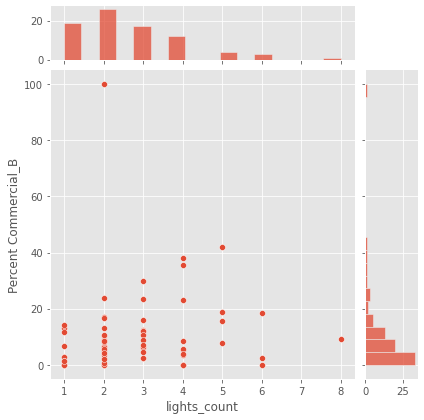

In [48]:
sns.jointplot(data=master, x="lights_count", y="Percent Commercial_B", marginal_ticks=True)

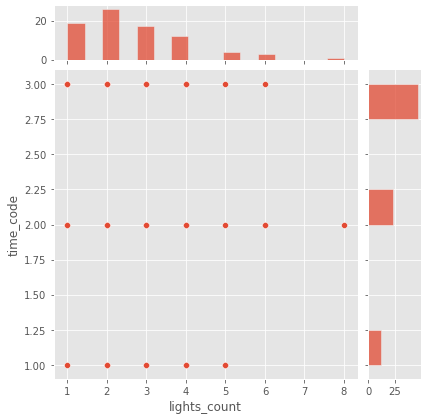

In [49]:
sns.jointplot(data=master, x="lights_count", y="time_code", marginal_ticks=True)